In [82]:
import cv2 as cv
def gaussian_filter(in_img):
    return cv2.GaussianBlur(in_img, (7, 7), 1)

In [83]:
import cv2 as cv
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error
from skimage import io
from skimage.color import rgb2gray, rgba2rgb
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os
from os import listdir

dir_path="C:/Users/nirav/Downloads/Untitled Folder/images"
psnr=[]
DT=[]
GT=[]

for img_file in os.listdir(dir_path):
    img_path = os.path.join(dir_path, img_file)
    img = cv.imread(img_path, cv2.IMREAD_COLOR) / 255.0
    input_img = gaussian_filter(img)
    output=input_img
    temp_psnr=[]
    temp_DT=[]
    temp_GT=[]

    for i in range(0,50):
        b_img=gaussian_filter(output)
        temp_psnr.append(peak_signal_noise_ratio(output,img,data_range=1))
        temp_GT.append(mean_squared_error(output,img))
        temp_DT.append(mean_squared_error(b_img,input_img))

        output=output+input_img-b_img
    psnr.append(temp_psnr)
    DT.append(temp_GT)
    GT.append(temp_DT)
# Display images
# print(DT)
# cv.imshow('Filtered Input', input_img)
# cv.imshow('Reversed Result', output)
# cv.waitKey(0)
# cv.destroyAllWindows()

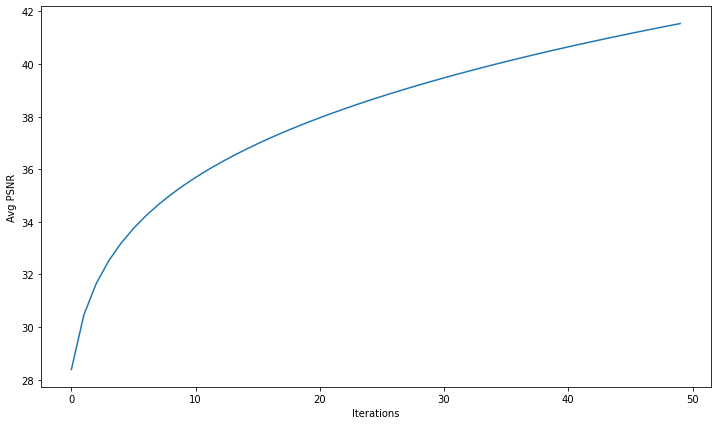

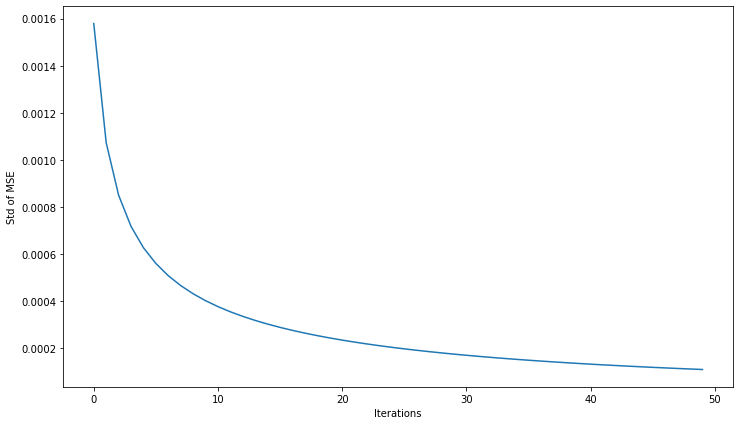

In [89]:
import numpy as np
import matplotlib.pyplot as plt

avg_psnr = np.mean(np.array(psnr), axis=0)
plt.figure(figsize=(12, 7))
plt.plot(list(range(0, 50)), avg_psnr)
plt.xlabel('Iterations')
plt.ylabel('Avg PSNR')
plt.savefig("gs_psnr.jpg", dpi=300)  
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(list(range(0, 50)), np.std(np.array(DT), axis=0))
plt.xlabel('Iterations')
plt.ylabel('Std of MSE')
plt.savefig("gs_std_of_mse.jpg", dpi=300) 
plt.show()
